# Time Series - Sunspot analysis

### Time Series project for IBM Machine Learning Professional Certificate

Dataset : Sunspot
Link: 

### Import libraries

In [146]:
from datetime import datetime

import numpy as np             
import pandas as pd 
from pandas.plotting import lag_plot

import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams["figure.figsize"] = (16,6)

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

import statsmodels.tsa.stattools as ts

from statsmodels.tsa.api import ExponentialSmoothing

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

from datetime import datetime
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.metrics import mean_squared_error

### Import data

In [24]:
df = pd.read_csv('Sunspots.csv')

In [25]:
df.shape

(3265, 3)

### Prepare data

In [26]:
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [27]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [28]:
df = df.drop(['Unnamed: 0'], axis=1)

In [29]:
df.index = df.Date

In [30]:
df = df.drop(['Date'], axis=1)

In [31]:
df

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


In [32]:
df = df.rename({'Monthly Mean Total Sunspot Number': 'sunspots'}, axis=1)

In [33]:
df

,sunspots
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


In [34]:
ts = pd.Series(data=df.sunspots, index=df.index)

In [35]:
ts

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
              ...  
2020-09-30      0.6
2020-10-31     14.4
2020-11-30     34.0
2020-12-31     21.8
2021-01-31     10.4
Name: sunspots, Length: 3265, dtype: float64

In [36]:
ts_month   = ts.resample('MS').mean()
ts_quarter = ts.resample('Q').mean()
ts_year    = ts.resample('Y').mean()

In [37]:
ts_month.describe()

count    3265.000000
mean       81.778775
std        67.889277
min         0.000000
25%        23.900000
50%        67.200000
75%       122.500000
max       398.200000
Name: sunspots, dtype: float64

In [38]:
ts_quarter.describe()

count    1089.000000
mean       81.735078
std        65.766234
min         0.000000
25%        24.000000
50%        69.100000
75%       120.333333
max       332.333333
Name: sunspots, dtype: float64

In [39]:
ts_year.describe()

count    273.000000
mean      81.539103
std       63.345457
min        0.000000
25%       24.900000
50%       69.783333
75%      118.883333
max      268.841667
Name: sunspots, dtype: float64

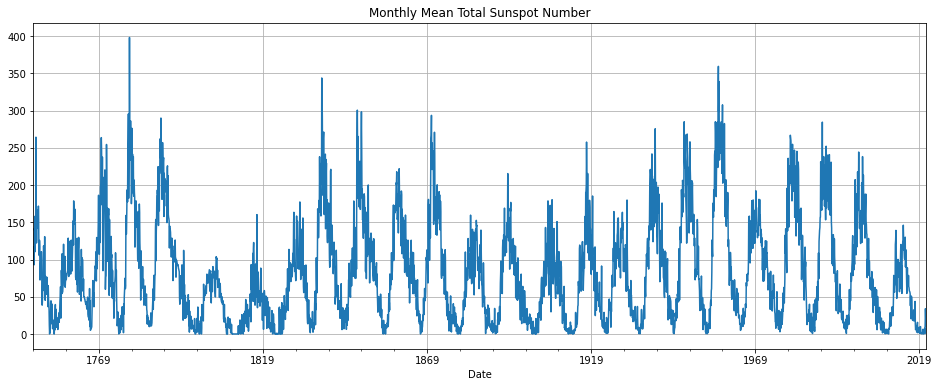

In [40]:
ts_month.plot()
plt.grid(b=True)
plt.title('Monthly Mean Total Sunspot Number')
plt.show()

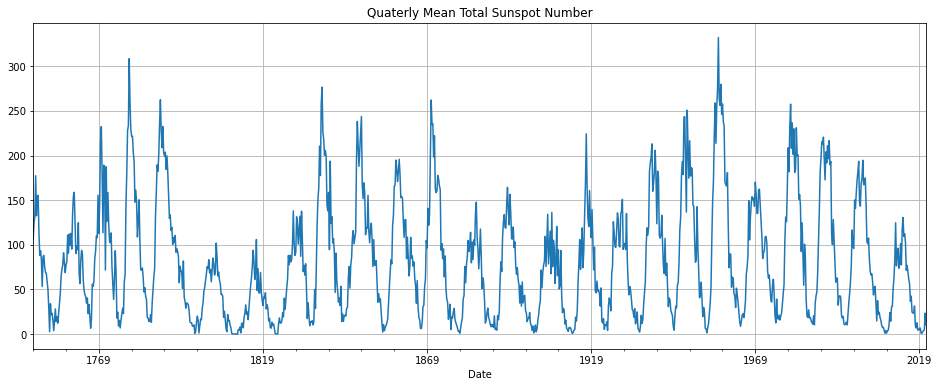

In [41]:
ts_quarter.plot()
plt.grid(b=True)
plt.title('Quaterly Mean Total Sunspot Number')
plt.show()

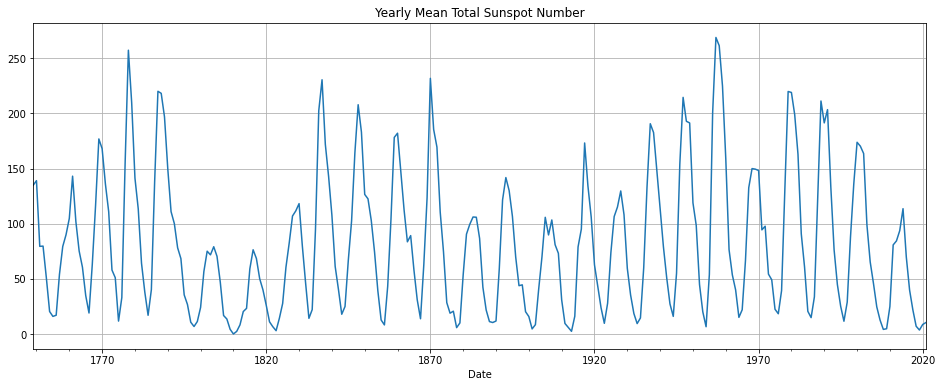

In [42]:
ts_year.plot()
plt.grid(b=True)
plt.title('Yearly Mean Total Sunspot Number')
plt.show()

<AxesSubplot:>

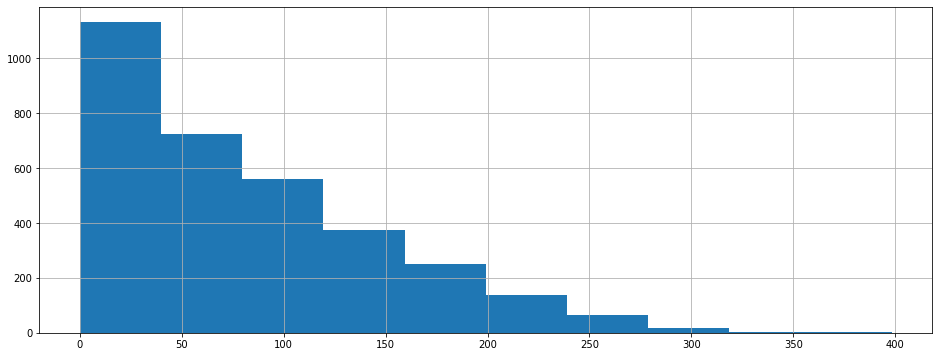

In [43]:
#Plot histogram
ts_month.hist()

<AxesSubplot:ylabel='Density'>

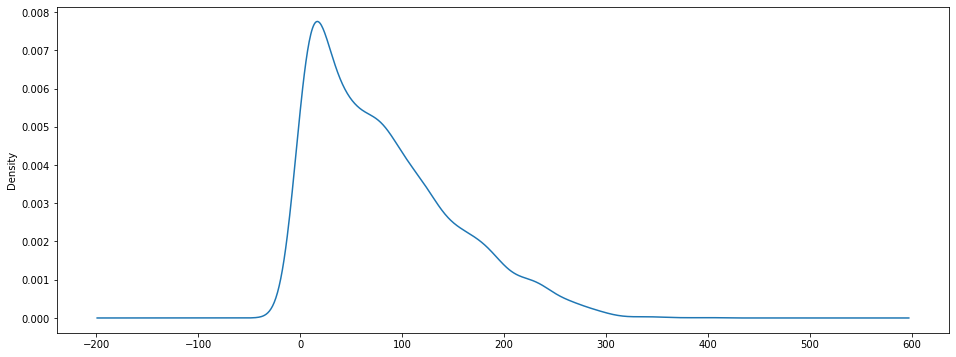

In [44]:
ts_month.plot(kind='kde')

<AxesSubplot:xlabel='sunspots', ylabel='Count'>

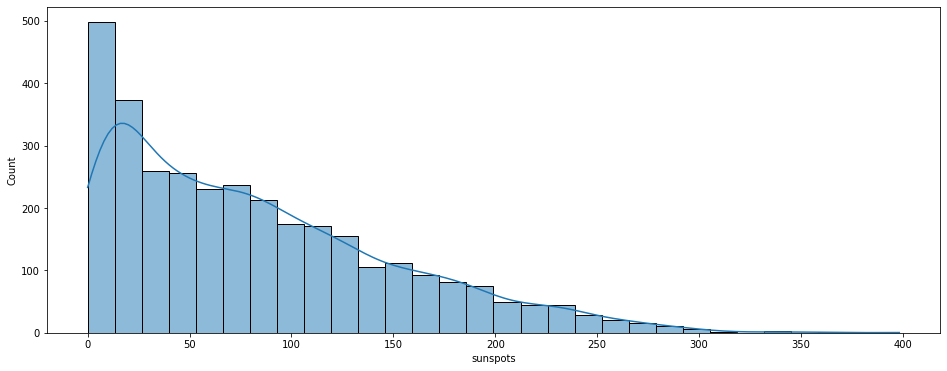

In [45]:
sns.histplot(data=ts_month, kde=True)

<AxesSubplot:xlabel='Month (in a year)', ylabel='Monthly Mean Total Sunspot Number'>

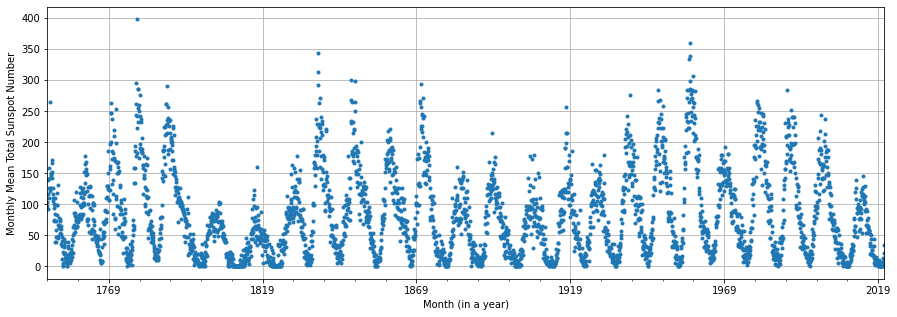

In [46]:
ts_month.plot(figsize = (15,5),grid = True, xlabel = 'Month (in a year)', ylabel = 'Monthly Mean Total Sunspot Number', legend = False, style = '.')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

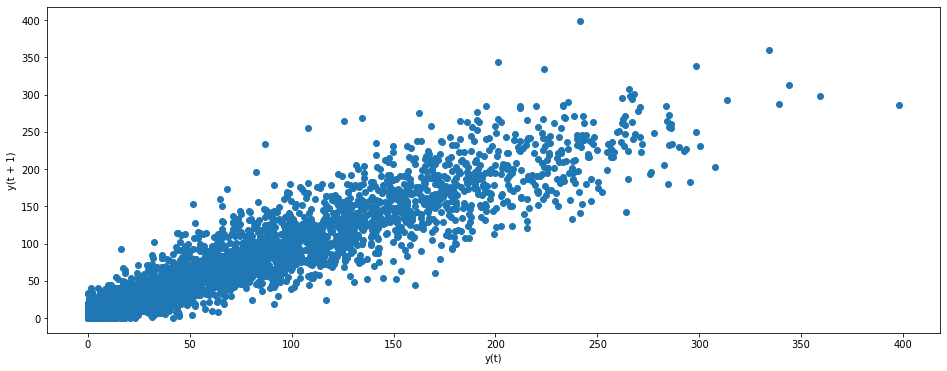

In [47]:
#Lag Scatter plot
lag_plot(ts_month)

The plot created from running the example shows a relatively strong positive correlation between observations and their lag1 values.

## Augmented Dickey-Fuller Test (ADF Test) 

In [53]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary

def dftest(timeseries):
    
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd  = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std  = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

In [54]:
# run DFT on monthly
plt.figure(figsize=(16, 6))
dftest(df.sunspots)

AttributeError: 'Series' object has no attribute 'adfuller'

<Figure size 1152x432 with 0 Axes>

-> p-value allows us to reject a unit root: data is stationary

## Autocorrelation (ACF) & Partial Autocorrelation (PACF)

In [55]:
# define helper plot function for visualization
def plots(data, lags=None):
    
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data)
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()

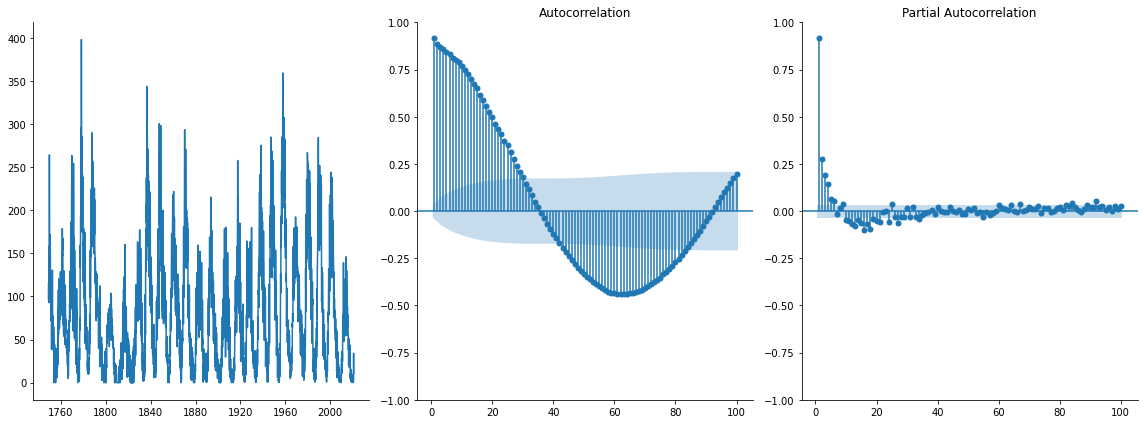

In [57]:
# helper plot
plt.figure(figsize=(16, 6))
plots(ts_month, lags=100);

## 1) Exponential Smoothing

In [26]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

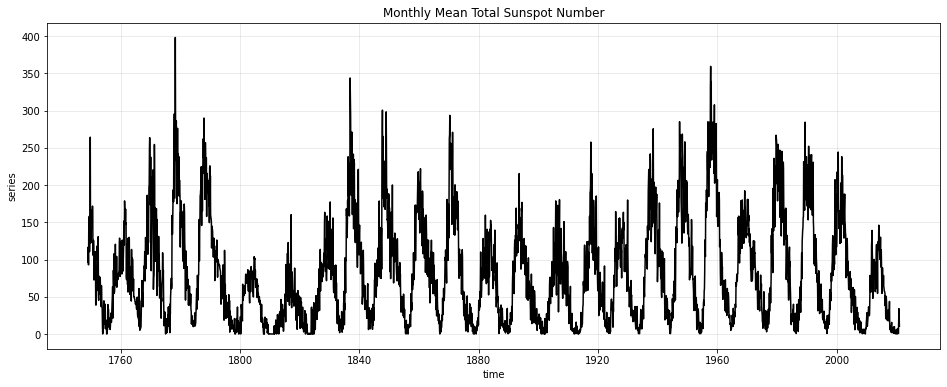

In [176]:
plt.figure(figsize=(16, 6))
#run_sequence_plot(df.index, df.sunspots,
run_sequence_plot(ts_month.index, ts_month,
                  title="Monthly Mean Total Sunspot Number")

In [178]:
# find mean of series
stationary_time_series_avg = np.mean(ts_month)

# create array composed of mean value and equal to length of time array
sts_avg = np.full(shape=len(ts_month.index), fill_value=stationary_time_series_avg, dtype='float')

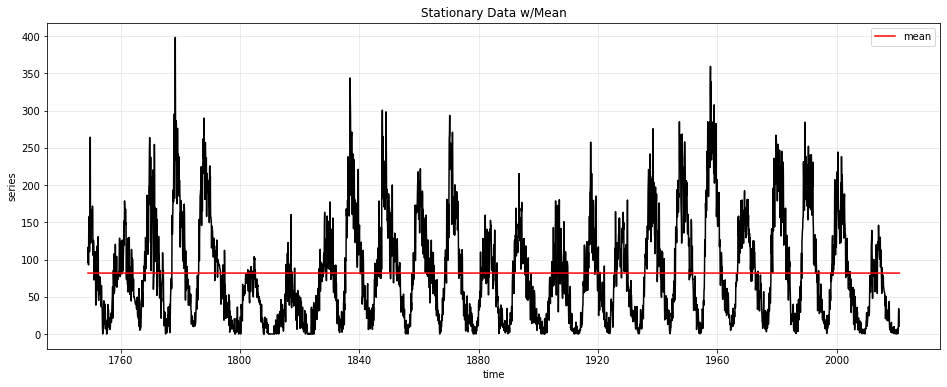

In [179]:
plt.figure(figsize=(16, 6))
run_sequence_plot(ts_month.index, ts_month,
                  title="Stationary Data w/Mean")
plt.plot(df.index, sts_avg, 'r', label="mean")
plt.legend();

<Figure size 1080x432 with 0 Axes>

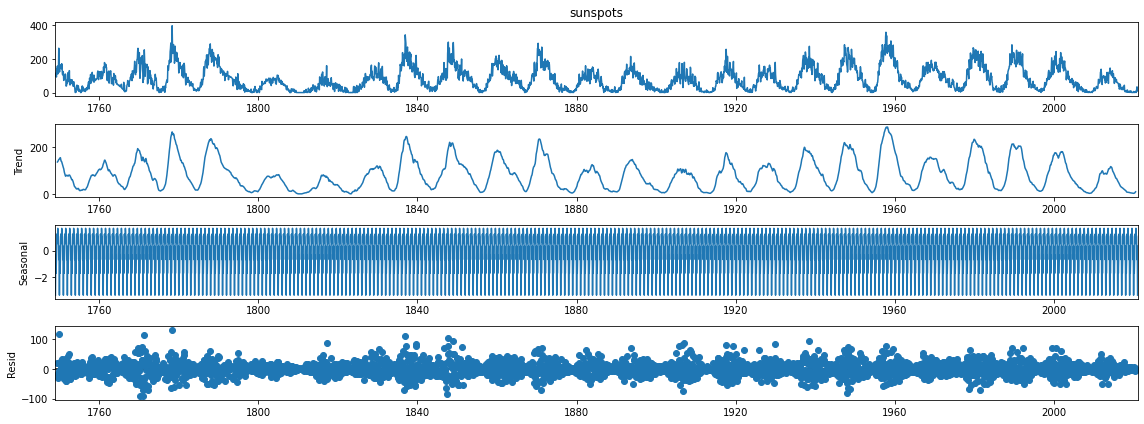

In [184]:
plt.figure(figsize=(15, 6))
decomposition = sm.tsa.seasonal_decompose(ts_month,model='additive')
fig = decomposition.plot()
plt.show()

#### Train/Test Split

In [133]:
train = ts_quarter[:-20]
test  = ts_quarter[-20:]

In [134]:
train

Date
1749-03-31    105.900000
1749-06-30    124.566667
1749-09-30    131.666667
1749-12-31    177.366667
1750-03-31    132.466667
                 ...    
2015-03-31     71.400000
2015-06-30     76.866667
2015-09-30     69.600000
2015-12-31     61.266667
2016-03-31     55.833333
Freq: Q-DEC, Name: sunspots, Length: 1069, dtype: float64

In [135]:
test

Date
2016-06-30    36.633333
2016-09-30    42.400000
2016-12-31    24.433333
2017-03-31    23.400000
2017-06-30    23.466667
2017-09-30    31.366667
2017-12-31     9.033333
2018-03-31     6.666667
2018-06-30    12.533333
2018-09-30     4.533333
2018-12-31     4.300000
2019-03-31     5.966667
2019-06-30     6.733333
2019-09-30     0.833333
2019-12-31     0.800000
2020-03-31     2.633333
2020-06-30     3.733333
2020-09-30     4.733333
2020-12-31    23.400000
2021-03-31    10.400000
Freq: Q-DEC, Name: sunspots, dtype: float64

In [136]:
train_array = train.to_numpy()
train_array

array([105.9       , 124.56666667, 131.66666667, ...,  69.6       ,
        61.26666667,  55.83333333])

In [137]:
test_array = test.to_numpy()
test_array

array([36.63333333, 42.4       , 24.43333333, 23.4       , 23.46666667,
       31.36666667,  9.03333333,  6.66666667, 12.53333333,  4.53333333,
        4.3       ,  5.96666667,  6.73333333,  0.83333333,  0.8       ,
        2.63333333,  3.73333333,  4.73333333, 23.4       , 10.4       ])

In [138]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

In [139]:
#Triple exponential smoothing
triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=130).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_preds_array  = triple_preds.to_numpy()
triple_mse = mse(test_array, triple_preds_array)
print("Predictions: ", triple_preds)

Predictions:  2016-06-30    47.363288
2016-09-30    36.484555
2016-12-31    35.723793
2017-03-31    21.964465
2017-06-30    23.015065
2017-09-30    26.989147
2017-12-31    10.631868
2018-03-31     0.544134
2018-06-30     5.089267
2018-09-30    -2.050890
2018-12-31    -2.972609
2019-03-31    -3.145016
2019-06-30    -3.978698
2019-09-30     3.495733
2019-12-31     0.817966
2020-03-31     6.461006
2020-06-30     7.763668
2020-09-30    15.933013
2020-12-31    16.874684
2021-03-31    29.123236
Freq: Q-DEC, dtype: float64


In [140]:
print("MSE: ", triple_mse)

MSE:  1245.0498475825689


In [141]:
time = np.arange(1089)
time

array([   0,    1,    2, ..., 1086, 1087, 1088])

In [142]:
train_array.shape

(1069,)

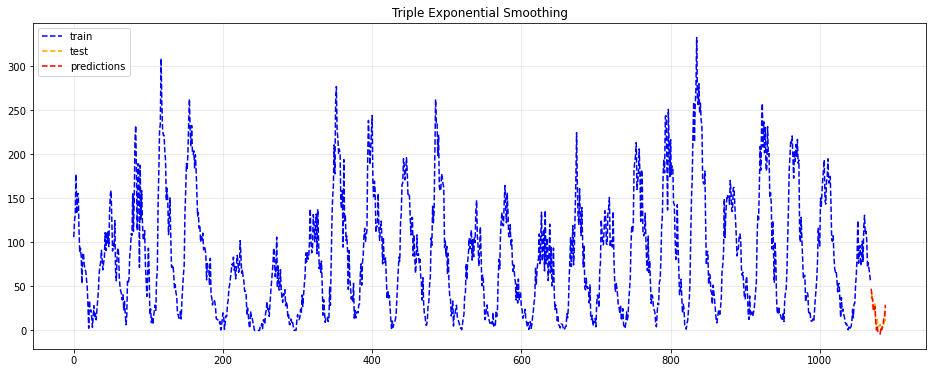

In [143]:
plt.figure(figsize=(16, 6))
plt.plot(time[:-20], train_array, 'b--', label="train")
plt.plot(time[-20:], test_array, color='orange', linestyle="--", label="test")
plt.plot(time[-20:], triple_preds_array, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

## 2) SARIMA

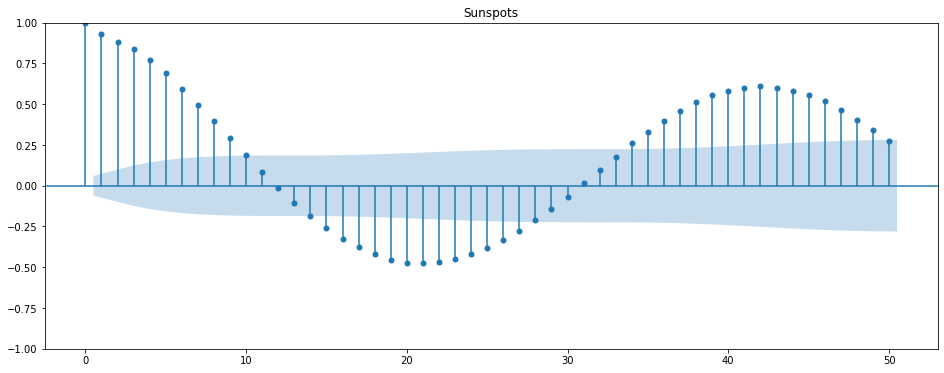

In [239]:
sm.tsa.graphics.plot_acf(train,lags=50,title='Sunspots')
plt.show()

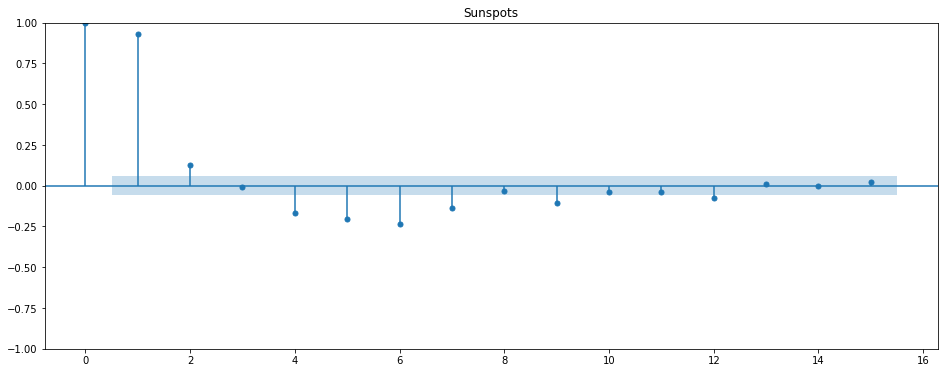

In [238]:
sm.tsa.graphics.plot_pacf(train,lags=15,title='Sunspots')
plt.show()

### MONTH: Build SARIMA model (7,0,32) (1,1,0,129)
p: PACF plot : p = first lag where the value is above the significance level. p=7

d: The test of stationarity (ADF Test) is significative with no differencing, so d=0

q: ACF plot : q = first lag where the value is above the significance level. q=10

P: ACF plot : P=1, ACF is positive at lag 129 AND P+Q≤2

D: D=1, the series has a stable seasonal pattern over time.

Q: ACF plot : Q=0 ACF is negative at lag 129 AND P+Q≤2

In [236]:
#MONTH: Build SARIMA model (7,0,32) (1,1,0,129)
#model = sm.tsa.statespace.SARIMAX(ts_month, trend='n', order=(7,0,32), seasonal_order=(1,1,0,129))
#results = model.fit()
#print(results.summary())

The SARIMA model based on the ts_month time series take too much time to fit.
So, the ts_quarter time series will be used instead.

### QUARTER: Build SARIMA model (3,0,10) (1,1,0,43)
p: PACF plot : p = first lag where the value is above the significance level. p=3

d: The test of stationarity (ADF Test) is significative with no differencing, so d=0

q: ACF plot : q = first lag where the value is above the significance level. q=10

P: ACF plot : P=1, ACF is positive at lag 43 AND P+Q≤2

D: D=1, the series has a stable seasonal pattern over time.

Q: ACF plot : Q=0 ACF is negative at lag 43 AND P+Q≤2

In [215]:
model = sm.tsa.statespace.SARIMAX(ts_quarter, trend='n', order=(3,0,10), seasonal_order=(1,1,0,43))
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                             sunspots   No. Observations:                 1089
Model:             SARIMAX(3, 0, 10)x(1, 1, [], 43)   Log Likelihood               -4911.796
Date:                              Thu, 14 Apr 2022   AIC                           9853.592
Time:                                      10:05:17   BIC                           9927.883
Sample:                                  03-31-1749   HQIC                          9881.766
                                       - 03-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9233      2.937      0.655      0.513      -3.833       7.680
ar.L2         -1.07

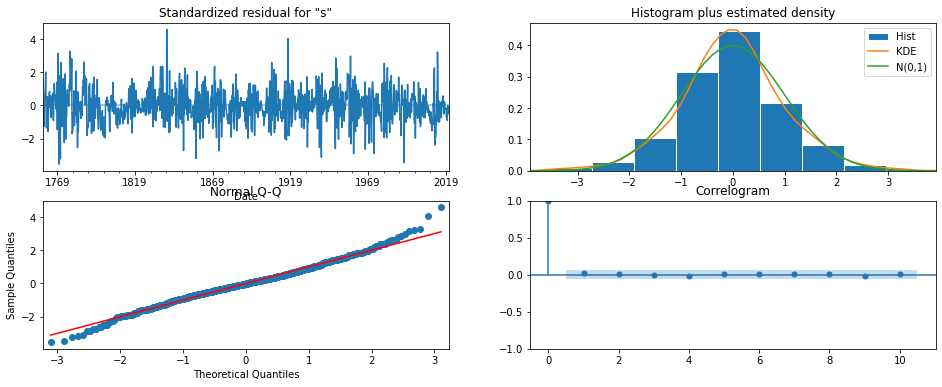

In [241]:
results.plot_diagnostics()
plt.show()

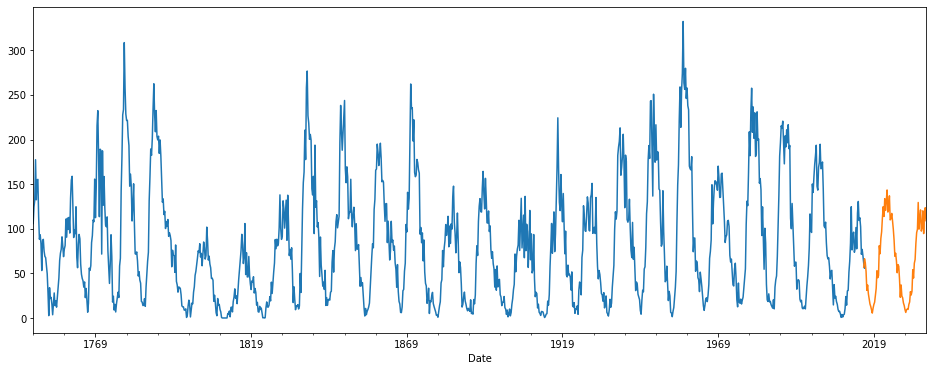

In [216]:
forecast = results.predict(start = train.index[-2], end= train.index[-2] + pd.DateOffset(months=240), dynamic= True) 
train.plot()
forecast.plot()
plt.show()

## 2) SARIMA with gridsearch (not working)

grid_model = pm.auto_arima(ts_quarter, start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=43,
                         start_P=0, seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
print(grid_model.summary())

In [ ]:
#stepwise_model.order

In [ ]:
#stepwise_model.seasonal_order

In [ ]:
#from dateutil.relativedelta import relativedelta

#def future_preds_df(model,series,num_months):
#    pred_first = series.index.max()+relativedelta(months=1)
#    pred_last = series.index.max()+relativedelta(months=num_months)
#    date_range_index = pd.date_range(pred_first,pred_last,freq = 'MS')
#    vals = model.predict(n_periods = num_months)
#    return pd.DataFrame(vals,index = date_range_index)

In [ ]:
#preds = future_preds_df(stepwise_model,monthly_temp.temp,100)

In [ ]:
#preds

In [ ]:
#plt.plot(monthly_temp.temp)
#plt.plot(preds)

In [ ]:
#stepwise_model.plot_diagnostics();

In [ ]:
#print('auto-fit order: :', stepwise_model.order)
#print('auto-fit seasonal_order: :', stepwise_model.seasonal_order)

def cross_validate(series,horizon,start,step_size,order = (1,0,0),seasonal_order = (0,0,0,0),trend=None):
    '''
    Function to determine in and out of sample testing of arima model    
    
    arguments
    ---------
    series (seris): time series input
    horizon (int): how far in advance forecast is needed
    start (int): starting location in series
    step_size (int): how often to recalculate forecast
    order (tuple): (p,d,q) order of the model
    seasonal_order (tuple): (P,D,Q,s) seasonal order of model
    
    Returns
    -------
    DataFrame: gives fcst and actuals with date of prediction
    '''
    fcst = []
    actual = []
    date = []
    for i in range(start,len(series)-horizon,step_size):
        model = sm.tsa.statespace.SARIMAX(series[:i+1], #only using data through to and including start 
                                order=order, 
                                seasonal_order=seasonal_order, 
                                trend=trend).fit()
        fcst.append(model.forecast(steps = horizon)[-1]) #forecasting horizon steps into the future
        actual.append(series[i+horizon]) # comparing that to actual value at that point
        date.append(series.index[i+horizon]) # saving date of that value
    return pd.DataFrame({'fcst':fcst,'actual':actual},index=date)

warnings.filterwarnings("ignore")
series = t
horizon = 12
start = 700
step_size = 3
order = (1,0,0)
seasonal_order = (0,1,1,12)

cv1 = cross_validate(monthly_temp.temp,12,700,3,
                    order = order,
                    seasonal_order = seasonal_order)

## 3) LSTM

In [151]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

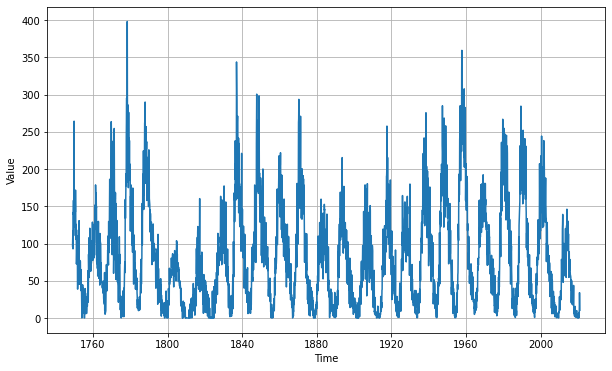

In [153]:
series = np.array(df['sunspots'])
time = np.array(df.index)

plt.figure(figsize = (10,6))
plot_series(time, series)

In [156]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [157]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer_size):
    series = tf.expand_dims(series, axis = -1)
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift = 1, drop_remainder = True)
    dataset = dataset.flat_map(lambda window : window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(lambda window : (window[:-1], window[-1:]))
    return dataset.batch(batch_size).prefetch(1)

In [158]:
def model_forecast(model, series, window_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    dataset = dataset.batch(32).prefetch(1)
    forecast = model.predict(dataset)
    return forecast

In [162]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5, strides=1, padding="causal",activation="relu", input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.LSTM(60),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(3000,)
Epoch 1/100
12/12 [==============================] - 7s 144ms/step - loss: 277.3525 - mse: 147707.1875
Epoch 2/100
12/12 [==============================] - 2s 147ms/step - loss: 264.0371 - mse: 138303.4219
Epoch 3/100
12/12 [==============================] - 2s 147ms/step - loss: 254.5896 - mse: 129383.5234
Epoch 4/100
12/12 [==============================] - 2s 150ms/step - loss: 243.6641 - mse: 119386.9531
Epoch 5/100
12/12 [==============================] - 2s 152ms/step - loss: 233.6371 - mse: 107408.5234
Epoch 6/100
12/12 [==============================] - 2s 176ms/step - loss: 222.1339 - mse: 100542.3984
Epoch 7/100
12/12 [==============================] - 2s 160ms/step - loss: 212.2174 - mse: 91650.0156
Epoch 8/100
12/12 [==============================] - 2s 164ms/step - loss: 202.9748 - mse: 83915.8125
Epoch 9/100
12/12 [==============================] - 2s 161ms/step - loss: 1

12/12 [==============================] - 3s 193ms/step - loss: 34.4987 - mse: 2397.0820
Epoch 81/100
12/12 [==============================] - 3s 189ms/step - loss: 42.1876 - mse: 3404.1985
Epoch 82/100
12/12 [==============================] - 3s 190ms/step - loss: 43.4191 - mse: 3763.2869
Epoch 83/100
12/12 [==============================] - 3s 192ms/step - loss: 40.1316 - mse: 3122.1672
Epoch 84/100
12/12 [==============================] - 3s 194ms/step - loss: 41.6848 - mse: 3395.3213
Epoch 85/100
12/12 [==============================] - 3s 202ms/step - loss: 42.4593 - mse: 3396.0266
Epoch 86/100
12/12 [==============================] - 3s 200ms/step - loss: 48.5755 - mse: 4547.8965
Epoch 87/100
12/12 [==============================] - 3s 234ms/step - loss: 49.9849 - mse: 4629.2593
Epoch 88/100
12/12 [==============================] - 3s 194ms/step - loss: 48.4049 - mse: 4332.4717
Epoch 89/100
12/12 [==============================] - 3s 195ms/step - loss: 48.3820 - mse: 4181.1377
Epo